# Предсказание диабета

## Диабет - это хроническое заболевание, которым страдают миллионы людей во всем мире. Раннее выявление диагноза и предрасположенности имееют решающее значение для предотвращения осложнений и эффективного лечения заболевания. В этой работе мы построим модель машинного обучения, которая сможет предсказать наличие у человека диабета на основе нескольких характеристик, таких как возраст, пол, гипертония, сердечно-сосудистые заболевания, история курения, индекс массы тела, уровень HbA1c и уровень глюкозы в крови.


### Датасет содержит данные о 100 000 пациентов, включая их историю болезни и результаты анализов.
### Набор данных содержит 9 столбцов, а именно:

### <font color="red">gender:</font> Пол пациента.
### <font color="red">age:</font> Возраст пациента в годах.
### <font color="red">hypertension:</font> Есть ли у пациента гипертония (1 = да, 0 = нет).
### <font color="red">heart_disease:</font> Есть ли у пациента сердечно-сосудистые заболевания (1 = да, 0 = нет).
### <font color="red">smoking_history:</font> История курения пациента (никогда, ранее или в настоящее время).

### <font color="red">bmi:</font> Индекс массы тела пациента (ИМТ).

### <font color="red">HbA1c_level:</font> Уровень HbA1c(показатель среднего уровня сахара в крови человека за последние 2-3 месяца) пациента.

### <font color="red">blood_glucose_level:</font> Уровень глюкозы в крови пациента натощак.

### <font color="green">diabetes:</font> Есть ли у пациента диагностированный диабет (1 = да, 0 = нет).

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score

In [2]:
data = pd.read_csv(r"C:\Users\ermol\AppData\Roaming\Microsoft\Windows\Network Shortcuts\diabetes_prediction_dataset.csv\diabetes_prediction_dataset.csv")

In [3]:
data

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


In [4]:
data['smoking_history'] = data['smoking_history'].replace({'never': 0, 'No Info': -1, 'former': 1, 'not current': 0, 'current': 2, 'ever': 2})

In [5]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data['gender'] = le.fit_transform(data['gender'])

In [6]:
data.describe()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.414660,41.885856,0.07485,0.039420,0.001160,27.320767,5.527507,138.058060,0.085000
std,0.493031,22.516840,0.26315,0.194593,0.991609,6.636783,1.070672,40.708136,0.278883
min,0.000000,0.080000,0.00000,0.000000,-1.000000,10.010000,3.500000,80.000000,0.000000
25%,0.000000,24.000000,0.00000,0.000000,-1.000000,23.630000,4.800000,100.000000,0.000000
50%,0.000000,43.000000,0.00000,0.000000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,1.000000,60.000000,0.00000,0.000000,0.000000,29.580000,6.200000,159.000000,0.000000
max,2.000000,80.000000,1.00000,1.000000,2.000000,95.690000,9.000000,300.000000,1.000000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  int32  
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  int64  
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int32(1), int64(5)
memory usage: 6.5 MB


In [8]:
print(data.duplicated().sum())

4286


In [9]:
data.drop_duplicates(inplace=True)
print(data.duplicated().any())

False


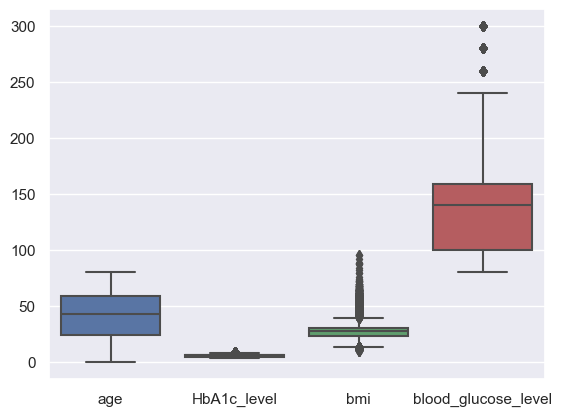

In [10]:
# Создание объекта Seaborn
sns.set()

# Выбор столбца для построения boxplot
data_for_boxplot = data[['age', 'HbA1c_level', 'bmi', 'blood_glucose_level']]

# Построение boxplot
sns.boxplot(data=data_for_boxplot)
plt.rcParams["figure.figsize"] = (6, 4)
plt.show()

In [11]:
Q1 = np.quantile(data['bmi'], 0.25)
Q3 = np.quantile(data['bmi'], 0.75)
IQR = Q3 - Q1
lower_whisker = Q1 - 1.5 * IQR
upper_whisker = Q3 + 1.5 * IQR

outliers = data[(data['bmi'] < lower_whisker) | (data['bmi'] > upper_whisker)]
print(outliers['bmi'])

11       54.70
39       56.43
59       63.48
93       55.61
98       50.13
         ...  
99892    44.39
99933    13.34
99953    60.52
99960    45.15
99993    40.69
Name: bmi, Length: 5223, dtype: float64


In [12]:
data = data.loc[(data['bmi'] >= lower_whisker) & (data['bmi'] <= upper_whisker)]

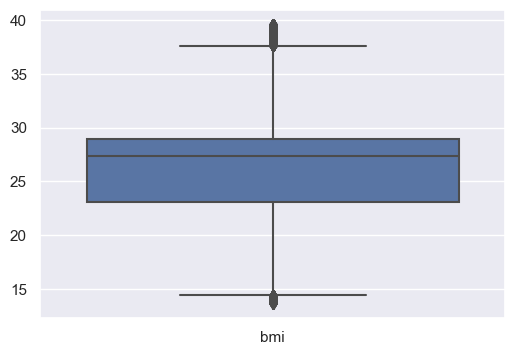

In [13]:
data_for_boxplot = data[['bmi']]

# Построение boxplot
sns.boxplot(data=data_for_boxplot)
plt.rcParams["figure.figsize"] = (12, 10)
plt.show()

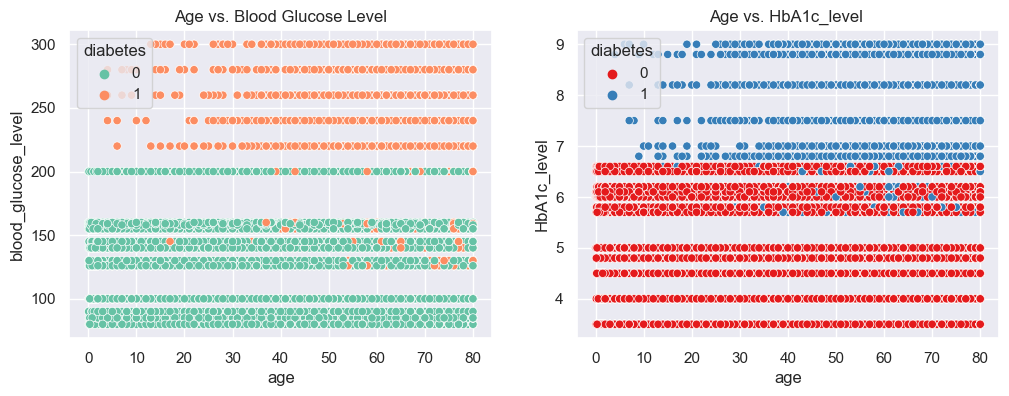

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

# Plot the first scatter plot on the first subplot
sns.scatterplot(x='age', y='blood_glucose_level', hue='diabetes', data=data, palette='Set2', ax=ax1)
ax1.set_title('Age vs. Blood Glucose Level')

# Plot the second scatter plot on the second subplot
sns.scatterplot(x='age', y='HbA1c_level', hue='diabetes', data=data, palette='Set1', ax=ax2)
ax2.set_title('Age vs. HbA1c_level ')

# Show the plot
plt.show()


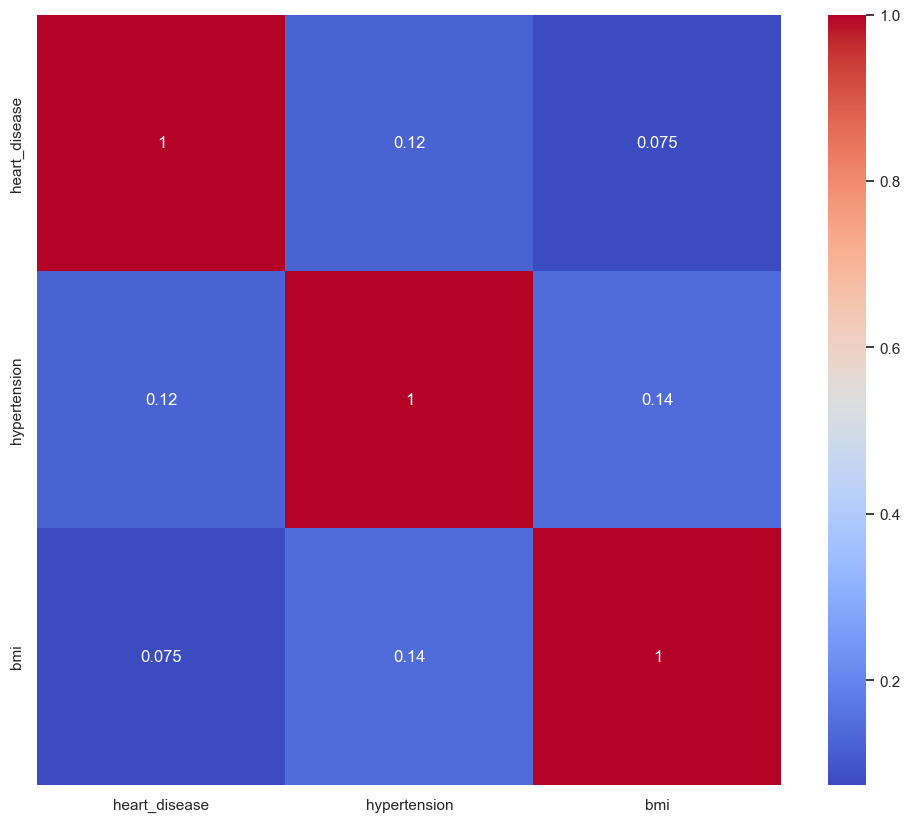

In [15]:
subset = data[['heart_disease', 'hypertension', 'bmi']]
# Получить матрицу корреляций
subset_corr = subset.corr()
# Визуализировать матрицу корреляций
sns.heatmap(subset_corr, annot=True, cmap='coolwarm')
plt.rcParams["figure.figsize"] = (2, 1)
plt.show()

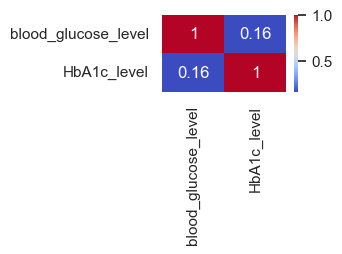

In [16]:
subset_2 = data[['blood_glucose_level', 'HbA1c_level']]
# Получить матрицу корреляций
subset_corr = subset_2.corr()
# Визуализировать матрицу корреляций
plt.rcParams["figure.figsize"] = (2, 1)
sns.heatmap(subset_corr, annot=True, cmap='coolwarm')

plt.show()

In [17]:
X = data.loc[:, ['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history', 'bmi', 'HbA1c_level', 'blood_glucose_level']].values
y = data.loc[:, 'diabetes'].values

# Разделяем датасет на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Создаем объект логистической регрессии
logreg = LogisticRegression(max_iter=1000)

# Обучаем модель на обучающей выборке
logreg.fit(X_train, y_train)

# Создаем объект случайного леса
ranfor = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)

# Обучаем модель на обучающей выборке
ranfor.fit(X_train, y_train)

# Оцениваем кросс-валидацию
cv_scores_logreg = cross_val_score(logreg, X_train, y_train, cv=5)
cv_scores_ranfor = cross_val_score(ranfor, X_train, y_train, cv=5)
# Оцениваем точность предсказаний
print("Logistic Regression CV Scores:", cv_scores_logreg)
print("Random Forest CV Scores:", cv_scores_ranfor)
print("Logistic Regression Accuracy:", accuracy_score(y_test, logreg.predict(X_test)))
print("Random Forest Accuracy:", accuracy_score(y_test, ranfor.predict(X_test)))
print("Logistic Regression Confusion Matrix:\n", confusion_matrix(y_test, logreg.predict(X_test)))
print("Random Forest Confusion Matrix:\n", confusion_matrix(y_test, ranfor.predict(X_test)))

Logistic Regression CV Scores: [0.96387872 0.96118516 0.96180412 0.96235668 0.96159691]
Random Forest CV Scores: [0.97479108 0.97216659 0.97299351 0.97423677 0.97333886]
Logistic Regression Accuracy: 0.9634233935576552
Random Forest Accuracy: 0.9740317144593624
Logistic Regression Confusion Matrix:
 [[16550   137]
 [  525   887]]
Random Forest Confusion Matrix:
 [[16687     0]
 [  470   942]]


In [18]:
from sklearn.metrics import precision_score, recall_score, f1_score

y_pred_logreg = logreg.predict(X_test)
y_pred_ranfor = ranfor.predict(X_test)

logreg_precision = precision_score(y_test, y_pred_logreg)
ranfor_precision = precision_score(y_test, y_pred_ranfor)

logreg_recall = recall_score(y_test, y_pred_logreg)
ranfor_recall = recall_score(y_test, y_pred_ranfor)

logreg_f1_score = f1_score(y_test, y_pred_logreg)
ranfor_f1_score = f1_score(y_test, y_pred_ranfor)

print("Logistic Regression Precision:", logreg_precision)
print("Random Forest Precision:", ranfor_precision)

print("Logistic Regression Recall:", logreg_recall)
print("Random Forest Recall:", ranfor_recall)

print("Logistic Regression F1-score:", logreg_f1_score)
print("Random Forest F1-score:", ranfor_f1_score)


Logistic Regression Precision: 0.8662109375
Random Forest Precision: 1.0
Logistic Regression Recall: 0.6281869688385269
Random Forest Recall: 0.6671388101983002
Logistic Regression F1-score: 0.7282430213464696
Random Forest F1-score: 0.800339847068819


In [19]:
from sklearn.ensemble import GradientBoostingClassifier

In [20]:
gb = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)

# Обучение модели
gb.fit(X_train, y_train)

# Предсказание на тестовой выборке
cv_scores_gb = cross_val_score(gb, X_train, y_train, cv=5)

print("Gradient Boosting CV Scores:", cv_scores_gb)

print("Gradient Boosting Accuracy:", accuracy_score(y_test, gb.predict(X_test)))

print("Gradient Boosting Confusion Matrix:\n", confusion_matrix(y_test, gb.predict(X_test)))


Gradient Boosting CV Scores: [0.97451481 0.97209752 0.97292444 0.97444398 0.97313165]
Gradient Boosting Accuracy: 0.9744737278302669
Gradient Boosting Confusion Matrix:
 [[16682     5]
 [  457   955]]


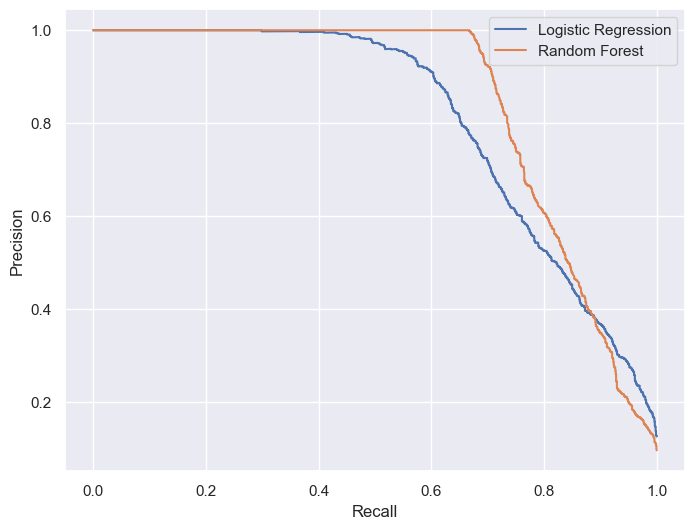

In [21]:
from sklearn.metrics import precision_recall_curve

# Получаем вероятности принадлежности классу 1 для тестовой выборки
y_scores_logreg = logreg.predict_proba(X_test)[:, 1]
y_scores_ranfor = ranfor.predict_proba(X_test)[:, 1]

# Вычисляем точность и полноту для разных порогов
precision_logreg, recall_logreg, thresholds_logreg = precision_recall_curve(y_test, y_scores_logreg)
precision_ranfor, recall_ranfor, thresholds_ranfor = precision_recall_curve(y_test, y_scores_ranfor)

# Строим кривую Precision-Recall для каждой модели
plt.figure(figsize=(8, 6))
plt.plot(recall_logreg, precision_logreg, label="Logistic Regression")


plt.plot(recall_ranfor, precision_ranfor, label="Random Forest")

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend()
plt.show()

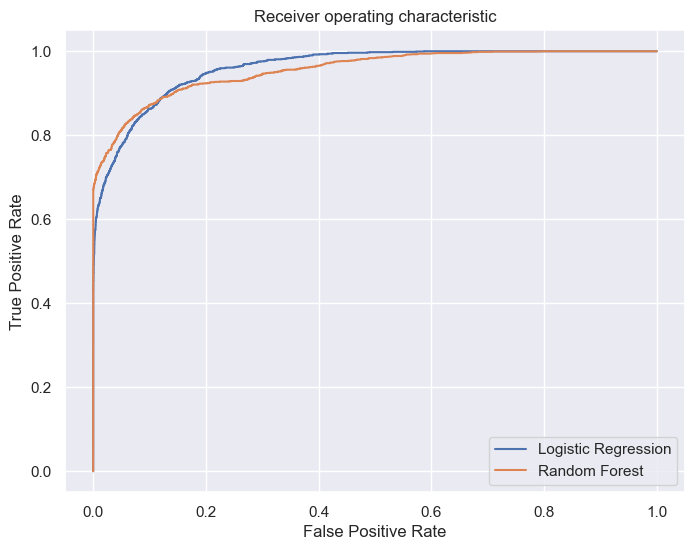

In [22]:
from sklearn.metrics import roc_curve, auc

# Получаем вероятности принадлежности классу 1 для тестовой выборки
y_scores_logreg = logreg.predict_proba(X_test)[:, 1]
y_scores_ranfor = ranfor.predict_proba(X_test)[:, 1]

# Вычисляем точность и полноту для разных порогов
fpr_logreg, tpr_logreg, thresholds_logreg = roc_curve(y_test, y_scores_logreg)
fpr_ranfor, tpr_ranfor, thresholds_ranfor = roc_curve(y_test, y_scores_ranfor)

# Строим кривую для логистической модели

plt.figure(figsize=(8, 6))
plt.plot(fpr_logreg, tpr_logreg, label="Logistic Regression")


# Строим кривую для модели случайного дерева

plt.plot(fpr_ranfor, tpr_ranfor, label="Random Forest")



plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()


In [23]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# определение модели
ranfor_par = RandomForestClassifier()

# задание сетки параметров для поиска
param_grid = {'n_estimators': [100, 200, 300],
              'max_depth': [5, 10, 15],
              'max_features': ['sqrt', 'log2']}

# создание объекта GridSearchCV и выполнение перекрестной проверки
grid_search = GridSearchCV(estimator=ranfor_par, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

# вывод результатов поиска
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)


Best parameters: {'max_depth': 10, 'max_features': 'sqrt', 'n_estimators': 100}
Best score: 0.973519174503898


In [45]:
rf = RandomForestClassifier(n_estimators=100, max_depth=10, max_features='sqrt', random_state=42 )
rf.fit(X_train, y_train)
print("Random with paramentrs Forest Accuracy:", accuracy_score(y_test, rf.predict(X_test)))

Random with paramentrs Forest Accuracy: 0.9740317144593624


In [49]:
y_pred_rf = rf.predict(X_test)
rf_f1_score = f1_score(y_test, y_pred_rf)
print("Random with paramentrs Forest F1-score:", ranfor_f1_score)

Random with paramentrs Forest F1-score: 0.800339847068819


In [60]:
patient_data = np.array([[1, 23.0, 0, 0, 0, 22.9, 5.4, 108]])
diabetes_probability = rf.predict_proba(patient_data)[0][1]

print(f"Вероятность диабета: {round(diabetes_probability * 100, 2)}%")

Вероятность диабета: 0.29%


In [62]:
patient_data = np.array([[1, 23.0, 0, 0, 0, 22.9, 5.4, 108]])
diabetes_probability = ranfor.predict_proba(patient_data)[0][1]

print(f"Вероятность диабета: {round(diabetes_probability * 100, 2)}%")

Вероятность диабета: 1.1%


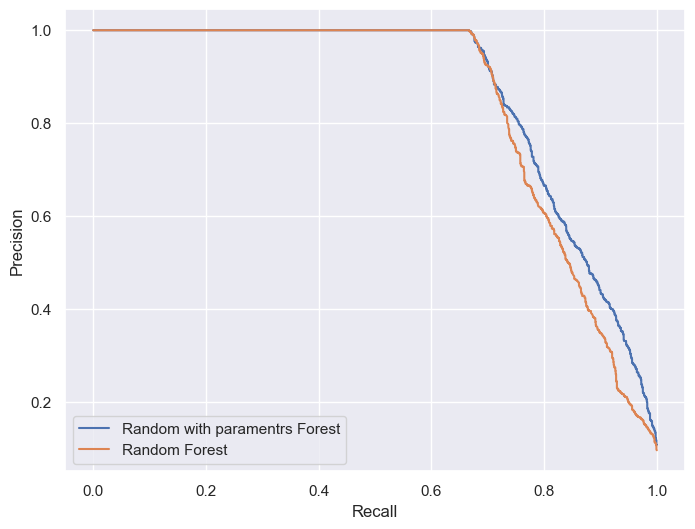

0.31835434127675216 0.9192241013178389 0.09509194423139468
0.37639346326800927 0.8581433411742088 0.13397100036613138


In [63]:
from sklearn.metrics import precision_recall_curve

# Получаем вероятности принадлежности классу 1 для тестовой выборки
y_scores_rf = rf.predict_proba(X_test)[:, 1]
y_scores_ranfor = ranfor.predict_proba(X_test)[:, 1]

# Вычисляем точность и полноту для разных порогов
precision_rf, recall_rf, thresholds_rf = precision_recall_curve(y_test, y_scores_rf)
precision_ranfor, recall_ranfor, thresholds_ranfor = precision_recall_curve(y_test, y_scores_ranfor)

# Строим кривую Precision-Recall для каждой модели
plt.figure(figsize=(8, 6))
plt.plot(recall_rf, precision_rf, label="Random with paramentrs Forest")


plt.plot(recall_ranfor, precision_ranfor, label="Random Forest")

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend()
plt.show()
print(np.mean(precision_rf), np.mean(recall_rf), np.mean(thresholds_rf))
print(np.mean(precision_ranfor), np.mean(recall_ranfor), np.mean(thresholds_ranfor))